In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
AMZN_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/AMZN_predictions_RFC.csv", index_col=0)


In [3]:
AMZN_predictions.head()

,Date,Predictions
0,2019-06-28,1
1,2019-05-31,1
2,2019-04-30,1
3,2019-03-29,0
4,2019-02-28,1


In [4]:
AMZN_predictions.Date = pd.to_datetime(AMZN_predictions.Date, format="%Y-%m-%d")

In [5]:
AMZN_predictions['Predictions'] = AMZN_predictions['Predictions'].shift(-1)


In [6]:
AMZN_predictions = AMZN_predictions.dropna()


In [7]:
AMZN_predictions = AMZN_predictions[::-1]

In [8]:
AMZN_predictions.head(10)

,Date,Predictions
111,2010-03-31,1.0
110,2010-04-30,0.0
109,2010-05-28,1.0
108,2010-06-30,1.0
107,2010-07-30,1.0
106,2010-08-31,1.0
105,2010-09-30,1.0
104,2010-10-29,1.0
103,2010-11-30,1.0
102,2010-12-31,0.0


In [9]:
AMZN_monthly = pd.read_csv("/Users/fahad/project_repo/data/external/AMZN_monthly.csv", index_col =0)

In [10]:
AMZN_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
AMZN_predictions = AMZN_predictions.set_index("Date")

In [12]:
AMZN_monthly.tail()

,Open,High,Low,Close,Volume
1998-06-30,88.00,104.80,41.25,99.75,95959350
1998-05-29,92.75,95.88,79.75,88.13,14572500
1998-04-30,85.25,100.00,77.13,91.75,29572400
1998-03-31,75.88,88.25,70.00,85.53,17234900
1998-02-27,59.38,79.63,57.25,77.00,10885100


In [13]:
AMZN_final_df = pd.merge(AMZN_predictions, AMZN_monthly, right_index=True, left_index=True)

In [14]:
AMZN_final_df.index = pd.to_datetime(AMZN_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

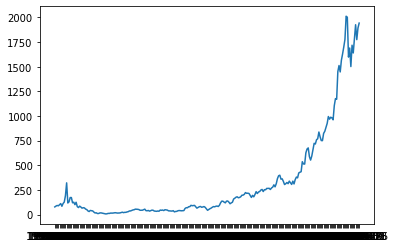

In [16]:
plt.plot(AMZN_monthly.index[::-1], AMZN_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0 and (position.is_short != True)  :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(AMZN_final_df, Binary_Classification_1d, cash=10000, commission=.02)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-06-28 00:00:00
Duration                        3376 days 00:00:00
Exposure [%]                                98.282
Equity Final [$]                            539587
Equity Peak [$]                             539587
Return [%]                                 5295.87
Buy & Hold Return [%]                      1294.73
Max. Drawdown [%]                         -23.5816
Avg. Drawdown [%]                         -6.83501
Max. Drawdown Duration           366 days 00:00:00
Avg. Drawdown Duration           108 days 00:00:00
# Trades                                        33
Win Rate [%]                               78.7879
Best Trade [%]                             105.904
Worst Trade [%]                           -20.0022
Avg. Trade [%]                             14.6667
Max. Trade Duration              549 days 00:00:00
Avg. Trade Duration              101 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/RFC/AMZN_RFC_Equity.csv")

In [25]:
df

,Equity
2010-04-30,10000.000000
2010-05-28,10642.828560
2010-06-30,9152.479565
2010-07-30,9875.396449
2010-08-31,10456.745599
2010-09-30,13156.584665
2010-10-29,13840.968320
2010-11-30,14692.887752
2010-12-31,15078.220042
2011-01-31,15858.411166
